In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix

In [3]:
# Loading data
df = pd.read_csv('Dataset/cleaned_adult.csv')

In [4]:
X = df.drop(['income'], axis=1) # Features
y = df['income'] # Label

In [5]:
# Apply Standard Scaler for the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [6]:
# Split the dataset
# 80% - Train & 20% - Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
X_train.shape

(36140, 13)

In [8]:
X_test.shape

(9035, 13)

## Model Training

In [9]:
# Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

GaussianNB()

## Model Testing

In [10]:
# Make predictions on the test data
predictions = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8128389596015495


In [11]:
# Generate Classification Report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      6830
           1       0.66      0.47      0.55      2205

    accuracy                           0.81      9035
   macro avg       0.75      0.70      0.72      9035
weighted avg       0.80      0.81      0.80      9035



In [16]:
# Predict class labels on the training dataset
y_train_pred_nb = nb_model.predict(X_train)

# Predict class labels on the testing dataset
y_test_pred_nb = nb_model.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_nb)
print(f'\nTraining Accuracy: {train_accuracy:.2f}')

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_nb)
print(f'Testing Accuracy: {test_accuracy:.2f}')


Training Accuracy: 0.81
Testing Accuracy: 0.81


## Model Testing Visualization

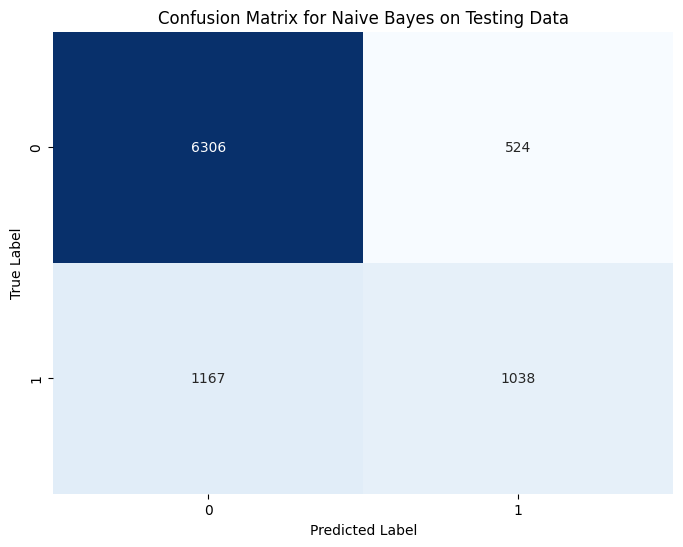

In [14]:
#Get the confusion matrix
cm_nb = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=nb_model.classes_,
            yticklabels=nb_model.classes_)
plt.title('Confusion Matrix for Naive Bayes on Testing Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

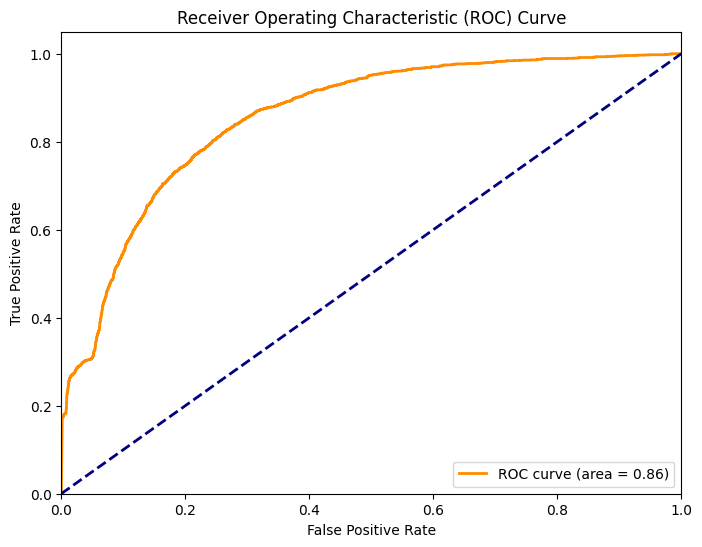

In [18]:
y_true = y_test
y_scores = nb_model.predict_proba(X_test)[:, 1]
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_true, y_scores)

# Compute ROC area under the curve
roc_auc = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()